In [52]:
import subprocess
import matplotlib.pyplot as plt

# Define the ranges of n and n_t to test
# n_values = [100, 1000, 10000, 100000, 1000000]
# n_t_values = [1, 2, 4, 8]
n_values = [10240,20480,30720, 40960, 51200, 61440, 71680, 81920, 92160, 102400]
n_t_values = [1, 2, 4]


In [53]:
# Run the program for each combination of n and n_t, and record the time taken
results = {}
for n in n_values:
    for n_t in n_t_values:
        cmd = ['./p.exe', str(n), str(n_t)]
        result = subprocess.run(cmd, capture_output=True, text=True)
        if result.returncode != 0:
            print(f'Error executing command {cmd}: {result.stderr}')
        else:
            last_number, time_taken = result.stdout.strip().rsplit(':', 1)
            time_taken = float(time_taken.strip()[:-2])
            results[(n, n_t)] = time_taken

print(results)
# Plot the results on a graph

{(10240, 1): 0.0, (10240, 2): 0.009, (10240, 4): 0.008, (20480, 1): 0.0, (20480, 2): 0.0, (20480, 4): 0.0, (30720, 1): 0.0, (30720, 2): 0.0, (30720, 4): 0.0, (40960, 1): 0.008, (40960, 2): 0.0, (40960, 4): 0.0, (51200, 1): 0.0, (51200, 2): 0.008, (51200, 4): 0.008, (61440, 1): 0.0, (61440, 2): 0.002, (61440, 4): 0.0, (71680, 1): 0.008, (71680, 2): 0.008, (71680, 4): 0.009, (81920, 1): 0.0, (81920, 2): 0.0, (81920, 4): 0.0, (92160, 1): 0.008, (92160, 2): 0.009, (92160, 4): 0.008, (102400, 1): 0.008, (102400, 2): 0.0, (102400, 4): 0.008}


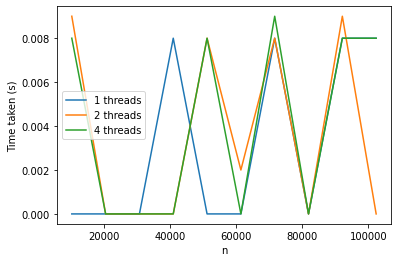

In [54]:
# Plot the results on a graph
fig, ax = plt.subplots()
for n_t in n_t_values:
    ax.plot(n_values, [results[(n, n_t)] for n in n_values], label=f'{n_t} threads')
ax.legend()
ax.set_xlabel('n')
ax.set_ylabel('Time taken (s)')
# ax.set_xscale('log') # Set the x-axis to a logarithmic scale
plt.show()
